# Importación de librerías

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from sklearn.model_selection import train_test_split

In [5]:
tf.keras.backend.clear_session()

# Cargar los datos, dividir los gatos de perros e iniciar el train_test_split

In [6]:
original_train_dir = '../data/raw/train'
dataset_dir = '../data/processed'
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')

os.makedirs(os.path.join(train_dir, 'cats'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'dogs'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'cats'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'dogs'), exist_ok=True)

all_files = os.listdir(original_train_dir)
cat_files = [f for f in all_files if f.startswith('cat.')]
dog_files = [f for f in all_files if f.startswith('dog.')]

cat_train, cat_test = train_test_split(cat_files, test_size=0.2, random_state=42)
dog_train, dog_test = train_test_split(dog_files, test_size=0.2, random_state=42)

- Contabilizar los datos entre los train y test

In [7]:
for file in cat_train:
    shutil.copy(os.path.join(original_train_dir, file), os.path.join(train_dir, 'cats', file))

for file in cat_test:
    shutil.copy(os.path.join(original_train_dir, file), os.path.join(test_dir, 'cats', file))

for file in dog_train:
    shutil.copy(os.path.join(original_train_dir, file), os.path.join(train_dir, 'dogs', file))

for file in dog_test:
    shutil.copy(os.path.join(original_train_dir, file), os.path.join(test_dir, 'dogs', file))

print(f"Cat train: {len(cat_train)}, Cat test: {len(cat_test)}")
print(f"Dog train: {len(dog_train)}, Dog test: {len(dog_test)}")

Cat train: 10000, Cat test: 2500
Dog train: 10000, Dog test: 2500


- Preprocesamiento de las imagenes

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 19215 images belonging to 2 classes.
Found 4803 images belonging to 2 classes.
Found 9018 images belonging to 2 classes.


- Inicialización del modelo

In [9]:
model = Sequential()
model.add(Conv2D(input_shape=(128,128,3), filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=2, activation="softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    33,558,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,062,722 (248.19 MB)

 Trainable params: 65,062,722 (248.19 MB)

 Non-trainable params: 0 (0.00 B)

# Entrenamiento del modelo

In [10]:
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[checkpoint, early_stopping]
)

/home/sytic/miniconda3/envs/tf-gpu/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1752878463.593412    5574 service.cc:152] XLA service 0x758e1c008ad0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752878463.593437    5574 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-07-18 16:41:03.695852: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1752878464.495330    5574 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-07-18 16:41:05.425489: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1076_0', 48 bytes spill stores, 48 bytes spill loads

2025-07-18 16:41:05.814802: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fus

237/601 ━━━━━━━━━━━━━━━━━━━━ 1:38 270ms/step - accuracy: 0.5073 - loss: 0.9570

2025-07-18 16:42:48.845526: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1076', 56 bytes spill stores, 56 bytes spill loads

2025-07-18 16:42:48.935336: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1076', 4 bytes spill stores, 4 bytes spill loads

2025-07-18 16:42:49.615341: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1083', 960 bytes spill stores, 960 bytes spill loads

2025-07-18 16:42:49.831873: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1076', 520 bytes spill stores, 520 bytes spill loads

2025-07-18 16:42:50.293494: I external

601/601 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.5020 - loss: 0.8165

2025-07-18 16:44:55.390084: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.21GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-07-18 16:45:09.066660: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_222', 56 bytes spill stores, 56 bytes spill loads

2025-07-18 16:45:09.283719: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_222', 336 bytes spill stores, 336 bytes spill loads

2025-07-18 16:45:09.437927: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_229', 100 bytes s

601/601 ━━━━━━━━━━━━━━━━━━━━ 254s 350ms/step - accuracy: 0.5020 - loss: 0.8163 - val_accuracy: 0.5009 - val_loss: 0.6931
Epoch 2/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 134s 222ms/step - accuracy: 0.4946 - loss: 0.6932 - val_accuracy: 0.5009 - val_loss: 0.6931
Epoch 3/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 132s 219ms/step - accuracy: 0.5020 - loss: 0.6932 - val_accuracy: 0.5009 - val_loss: 0.6932
Epoch 4/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 132s 219ms/step - accuracy: 0.5114 - loss: 0.6930 - val_accuracy: 0.4991 - val_loss: 0.6932


In [11]:
test_loss, test_accuracy = model.evaluate(test_generator)
test_accuracy

281/282 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5077 - loss: 0.6931

2025-07-18 16:52:18.111349: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_229', 4 bytes spill stores, 4 bytes spill loads

2025-07-18 16:52:18.455928: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_222_0', 36 bytes spill stores, 36 bytes spill loads

2025-07-18 16:52:18.581972: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_222', 4 bytes spill stores, 4 bytes spill loads

2025-07-18 16:52:18.643961: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_222', 476 bytes spill stores, 476 bytes spill loads

2025-07-18 16:52:18.709970: I external/local

282/282 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - accuracy: 0.5076 - loss: 0.6931


0.5026613473892212

# Visualización y guardado del modelo

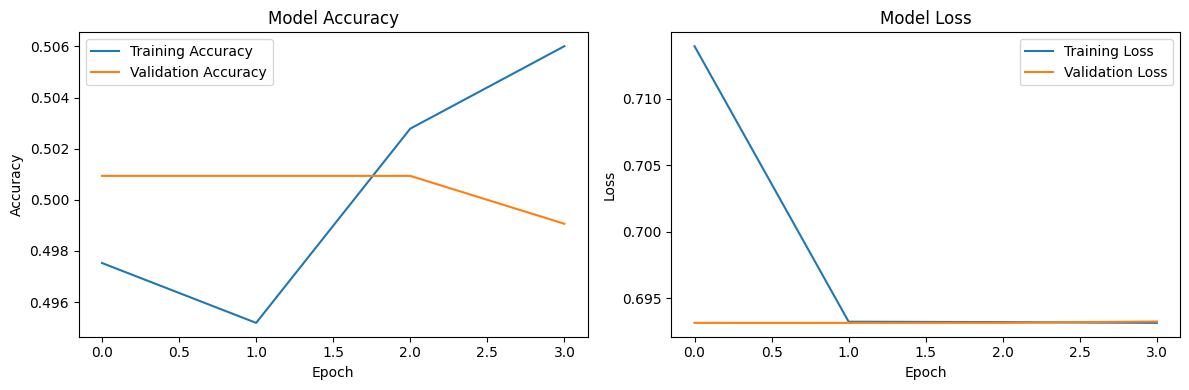

In [12]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

model.save('dogs_cats_model.h5')